# Chapter 6 - Compaction and its inherent length scale

## The compaction-press problem 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

The solution to the Filter Press problem was given as
\begin{equation}
  \label{eq:filterpress-cmprate}
  \cmp(z) = -\frac{W_0}{\cmplength_0}\,\e^{z/\cmplength_0} \quad \text{ for } \quad z\le0.
\end{equation}

In [2]:
def compaction_rate(z):
    return -np.exp(z)

The compact rate function, equation \eqref{eq:filterpress-cmprate}, is plotted in Figure below.

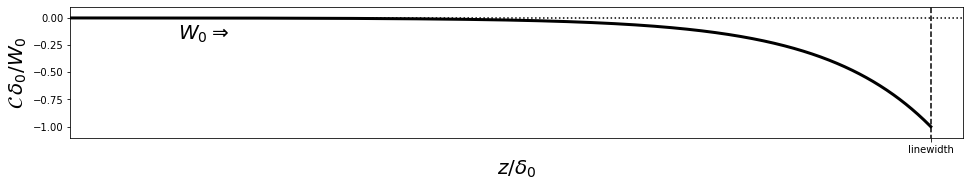

In [3]:
plt.ioff()

fig, ax = plt.subplots()
zoom = 2.0
fig.set_size_inches(8.0 * zoom, 1.2 * zoom)

z = np.linspace(-8, 0.0, 1000)
C = compaction_rate(z)

plt.plot([0., 0], [-2., 2], '--k','linewidth', 1)
plt.plot([-8.0, 1.0],[0., 0], ':k','linewidth', 1)
plt.plot(z, C, '-k', linewidth=3)
plt.xlabel('$z/\delta_0$', fontsize=20)
plt.ylabel('$\mathcal{C}\,\delta_0/W_0$', fontsize=20)
plt.annotate('$W_0\Rightarrow$', xy=[-7.0, -0.2], fontsize=20, horizontalalignment='left')
ax.set_xlim(-8.0, 0.3)
ax.set_ylim(-1.1, 0.1)
plt.show()

## The permeability-step problem

The porosity is given by the piece-wise constant function,
\begin{equation}
  \label{eq:permstep-porosity}
  \por(z) =
  \begin{cases}
    f_p\por_0 & \text{for $z > 0$},\\
    f_m\por_0 & \text{for $z \le 0$},
  \end{cases}
\end{equation}
where $f_i$ ($i=p,m$) are constants that multiply the reference porosity, chosen such that $f_i-\vert 1\vert\ll 1$.

The solution of the permeability-step problem was given as

\begin{equation}
  \label{eq:permstep-solution-full}
  \cmp(z) = \frac{\por_0w_0}{\cmplength_0}\tilde{f}
  \begin{cases}
    \exp\left(-z/\cmplength_p\right) & \text{for $z>0$},\\
    \exp\left(z/\cmplength_m\right) & \text{for $z\le 0$}.
  \end{cases}
\end{equation}

In [4]:
def cmprate(fp, fm, f0, n, z):
      cmp = (np.power(fm, n) * 
            (1.0 - fm*f0) - np.power(fp, n) * (1.0 - fp*f0))/(np.power(fm, 0.5*n) + np.power(fp, 0.5*n))
      return np.asarray([cmp*np.exp(-z_* np.power(fp, -0.5*n)) if z_ > 0.0 
                         else cmp*np.exp(z_ * np.power(fm, 0.5*n)) for z_ in z])

The one-dimensional segregation flux $q \equiv \por(w-W)$ is given by 

\begin{equation}
  \label{eq:permstep-darcy-flux-solution}
  q = \por_0w_0
  \begin{cases}
    \left[f_p^\permexp(1-f_p\por_0) + \tilde{f}f_p^{\permexp/2}\exp(-z/\cmplength_p)\right] & z>0,\\[2mm]
    \left[f_m^\permexp(1-f_m\por_0) - \tilde{f}f_m^{\permexp/2}\exp(z/\cmplength_m)\right] & z\le0.
  \end{cases}
\end{equation}

In [5]:
def segflux(fp, fm, f0, n, z):
      cmp = (np.power(fm, n) * 
            (1.0 - fm*f0) - np.power(fp, n) * (1.0 - fp*f0))/(np.power(fm, 0.5*n) + np.power(fp, 0.5*n))
      return np.asarray([np.power(fp, n)*(1.0-fp*f0) + cmp*np.power(fp, 0.5*n)*np.exp(-z_* np.power(fp, -0.5*n)) 
                         if z_ > 0.0 
                         else np.power(fm, n)*(1.0 - fm*f0) - cmp* np.power(fm, 0.5*n)*np.exp(z_* np.power(fm, -0.5*n))
                         for z_ in z])

### Case 1

The porosity increases with *z*: $f_m=0.85$, $f_p=1.15$.

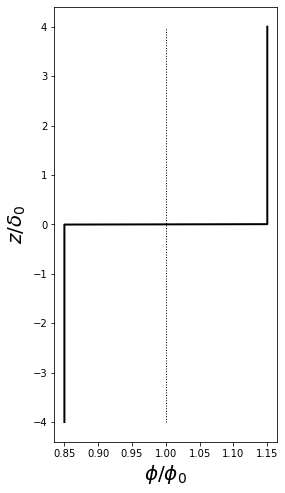

In [6]:
fm, fp = 0.85, 1.15

z = np.linspace(-4.0, 4.0, 1000)

fig, ax = plt.subplots()
zoom = 4.0
fig.set_size_inches(1.0 * zoom, 2.0 * zoom)

f = np.asarray([fm if z_<0.0 else fp for z_ in z])
plt.plot(f, z, '-k', linewidth=2)
plt.plot(np.ones(1000), z, ':k', linewidth=1)
plt.ylabel(r'$z/\delta_0$', fontsize=20)
plt.xlabel(r'$\phi/\phi_0$', fontsize=20)
plt.show()


The figure below shows that the scaled compaction rate and segregation flux for the porosity increase:

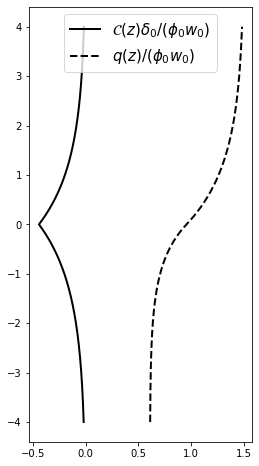

In [7]:
zmax = 4
n = 3
f0 = 0.01
z = np.linspace(-4.0, 4.0, 1000)

fig, ax = plt.subplots()
zoom = 4.0
fig.set_size_inches(1.0 * zoom, 2.0 * zoom)

C = cmprate(fp, fm, f0, n, z)
fwmW = segflux(fp, fm, f0, n, z)
plt.plot(C, z, '-k', linewidth=2, label='$\mathcal{C}(z)\delta_0/(\phi_0w_0)$')
plt.plot(fwmW, z,'--k', linewidth=2, label='$q(z)/(\phi_0w_0)$')
plt.legend(fontsize=15, loc='upper center')
plt.show()

### Case 2

The porosity decreases with *z*: $f_m=1.15$, $f_p=0.85$

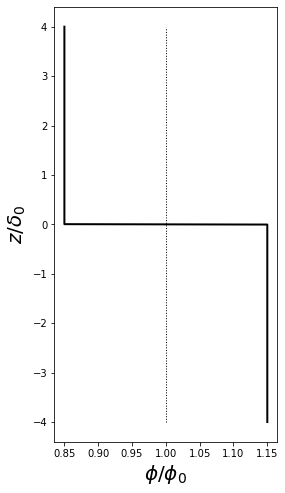

In [8]:
fm, fp = 1.15, 0.85

fig, ax = plt.subplots()
zoom = 4.0
fig.set_size_inches(1.0 * zoom, 2.0 * zoom)

f = np.asarray([fm if z_<0.0 else fp for z_ in z])
plt.plot(f, z, '-k', linewidth=2)
plt.plot(np.ones(1000), z, ':k', linewidth=1)
plt.ylabel(r'$z/\delta_0$', fontsize=20)
plt.xlabel(r'$\phi/\phi_0$', fontsize=20)
plt.show()

The figure below shows that the scaled compaction rate and segregation flux for the porosity decrease:

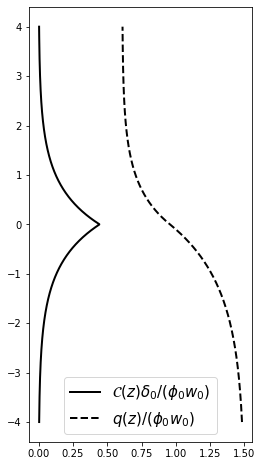

In [9]:
zmax = 4
n = 3
f0 = 0.01
z = np.linspace(-4.0, 4.0, 1000)

fig, ax = plt.subplots()
zoom = 4.0
fig.set_size_inches(1.0 * zoom, 2.0 * zoom)

C = cmprate(fp, fm, f0, n, z)
fwmW = segflux(fp, fm, f0, n, z)
plt.plot(C, z, '-k', linewidth=2, label='$\mathcal{C}(z)\delta_0/(\phi_0w_0)$')
plt.plot(fwmW, z,'--k', linewidth=2, label='$q(z)/(\phi_0w_0)$')
plt.legend(fontsize=15, loc='lower center')
plt.show()

## Propagation of small porosity disturbances

The phase ($c_p$) and group ($c_g$) velocities are given as

\begin{align}
\label{eq:linwave-phase-vel}
    c_p &= \frac{\permexp}{k^2 + 1},\\
    c_g &= c_p - \frac{2\permexp k^2}{(k^2 + 1)^2}. 
\end{align}

The phase ($c_p$) and group ($c_g$) velocities are plotted below as a function of the wavelength $\lambda=2\pi/k$.

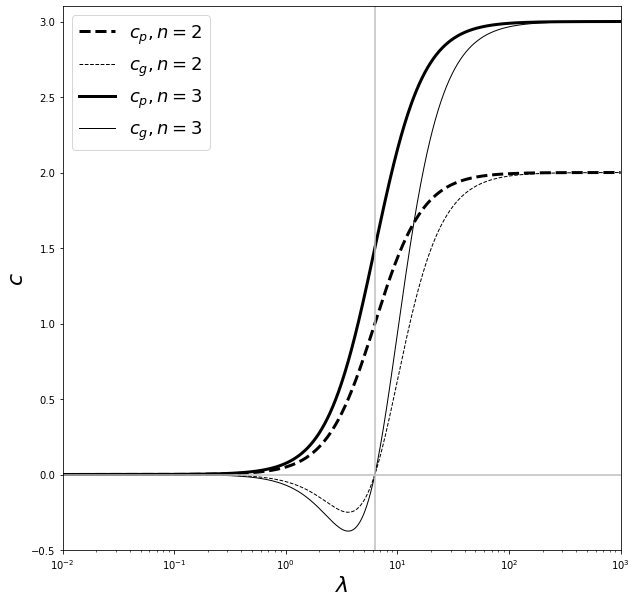

In [10]:
fig, ax = plt.subplots()
zoom = 2.0
fw, fh = 5.0, 5.0
fig.set_size_inches(fw * zoom, fh * zoom)
fig.set_facecolor('w')

lambdas = np.logspace(-2.0, 3.0, 1000)
k = 2*np.pi/lambdas

n = 2.0
cp = n/(k ** 2 + 1)
cg = cp - 2.0 * n * (k**2) / ((k**2 + 1.0) ** 2)
plt.semilogx(lambdas, cp, '--k', linewidth=3, label='$c_p, n=2$')
plt.semilogx(lambdas, cg, '--k', linewidth=1, label='$c_g, n=2$')

n = 3.0
cp = n/(k**2 + 1)
cg = cp - 2.0 * n * (k**2) / ((k**2 + 1.0) ** 2)
plt.semilogx(lambdas, cp, '-k', linewidth=3, label='$c_p, n=3$')
plt.semilogx(lambdas, cg, '-k', linewidth=1, label='$c_g, n=3$')

plt.plot([10**(-5), 10**5], [0.0, 0.0], '-', color=[0.75, 0.75, 0.75])
plt.plot([2.0*np.pi, 2.0*np.pi],[-10.0, 10.0],'-', color=[0.75, 0.75, 0.75])

plt.xlabel(r'$\lambda$', fontsize=22)
plt.ylabel(r'$c$', fontsize=22)

ax.set_ylim(-0.5, 3.1)
ax.set_xlim(10**(-2), 10**3)

plt.legend(fontsize=18)
plt.show()

## Magmatic solitary waves

The solitary wave speed $v$ is computed as

\begin{equation}
  \label{eq:magmons-wavespeed}
  \solwavespeed(\solwaveamp) = 
  \begin{cases}
    (\solwaveamp-1)^2/\left(\solwaveamp\ln\solwaveamp - \solwaveamp+1\right)& \text{for }\permexp=2,\\
    2\solwaveamp + 1 & \text{for }\permexp=3.
  \end{cases}
\end{equation}

The dimensionless solitary wave speed $\solwavespeed$ computed with equation \eqref{eq:magmons-wavespeed} as a function of wave amplitude $\solwaveamp$ relative to the background porosity is plotted below.

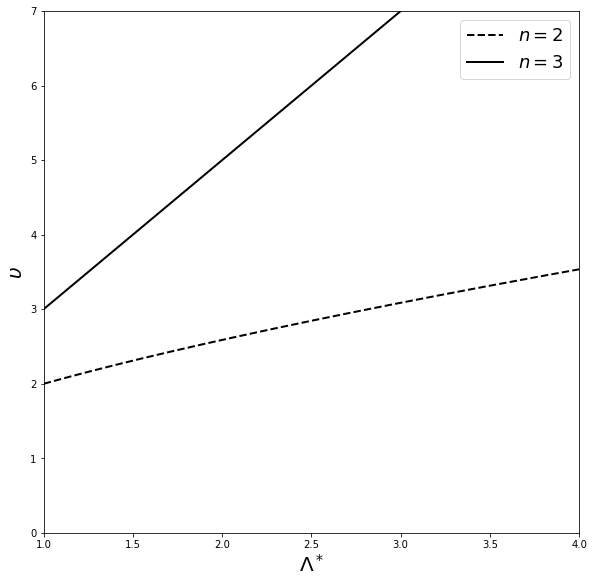

In [11]:
fig, ax = plt.subplots()
zoom = 2.0
fw, fh = 4.8, 4.8
fig.set_size_inches(fw * zoom, fh * zoom)
fig.set_facecolor('w')

lambdas = np.linspace(1.001, 4.0, 1000)

c2 = (lambdas - 1.0)**2 / (lambdas * np.log(lambdas) - lambdas + 1.0)
c3 = 2.0 * lambdas + 1.0

plt.plot(lambdas, c2, '--k', linewidth=2, label='$n=2$')
plt.plot(lambdas, c3, '-k', linewidth=2, label='$n=3$')

ax.set_xlim(1.0, 4.0)
ax.set_ylim(0.0, 7.0)

plt.xlabel(r'$\Lambda^*$', fontsize=20)
plt.ylabel(r'$\upsilon$', fontsize=20)

plt.legend(fontsize=18)
plt.show()

The normalized porosity profile is obtained through numerical inversion of

\begin{equation}
  \label{eq:magmons-implict-shape}
  Z(\solwave) = \left(\solwaveamp+\tfrac{1}{2}\right)^{\tfrac{1}{2}}\left[
    \frac{1}{(\solwaveamp-1)^{\tfrac{1}{2}}}\ln\left(
      \frac{(\solwaveamp-1)^{\tfrac{1}{2}}-(\solwaveamp-\solwave)^{\tfrac{1}{2}}}
      {(\solwaveamp-1)^{\tfrac{1}{2}}+(\solwaveamp-\solwave)^{\tfrac{1}{2}}}
    \right)-2\left(\solwaveamp-\solwave\right)^{\tfrac{1}{2}}\right].
\end{equation}

which is implemented in Python as

In [12]:
def porosity(f, z, A): 
    sqrtAf = np.sqrt(A-f)
    sqrtAm1 = np.sqrt(A - 1.)
    return z + np.sqrt(A+0.5)*(-2.*sqrtAf + np.log((sqrtAm1-sqrtAf)/(sqrtAm1+sqrtAf))/sqrtAm1)

Profiles of normalised porosity perturbation for solitary waves of various amplitude are plotted below. We set $\permexp=3$ in all cases.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
//anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


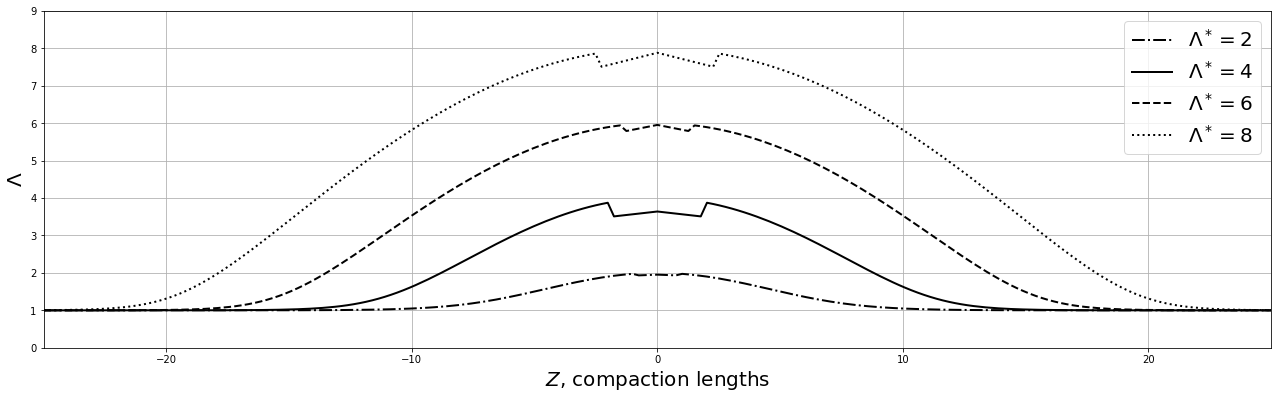

In [13]:
from scipy.optimize import fsolve

fig, ax = plt.subplots()
zoom = 2.0
fig.set_size_inches(11. * zoom, 3.1 * zoom)
fig.set_facecolor('w')

zmax = 25.0
zs = np.linspace(0.0, zmax, 100)
zm = 0.5*(zs[1:]+zs[0:-1])

AsLS = {2.: '-.', 4.: '-', 6.:'--', 8.: ':'}
for A, ls in AsLS.items():
    phi = np.asarray([fsolve(lambda f: porosity(f, z, A), 1.000000001) for z in zs])
    plt.plot(np.concatenate((-zs[::-1], zs), axis=0), np.concatenate((phi[::-1], phi), axis=0), 
             'k', label='$\Lambda^* = '+str(int(A))+'$', linestyle=ls, linewidth=2)
ax.set_xlim(-zmax, zmax)
ax.set_ylim(0.0, 9.0)
ax.grid()
plt.xlabel(r'$Z$, compaction lengths', fontsize=20)
plt.ylabel(r'$\Lambda$', fontsize=20)

plt.legend(fontsize=20)
plt.show()

Profiles of compaction rate for solitary waves of various amplitude. $\permexp=3$ in all cases. The gravity vector $\gravity$ points to the left, as indicated in the figure below.

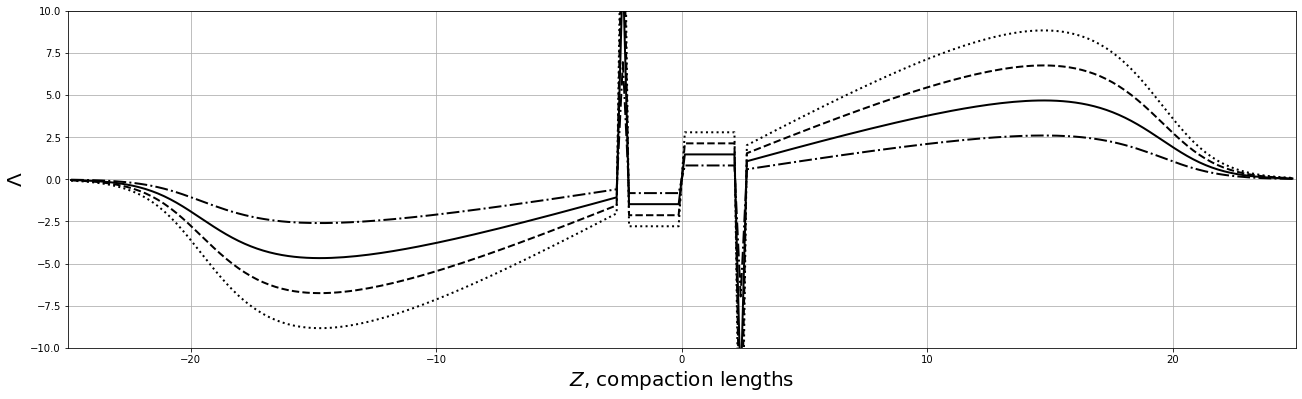

In [14]:
fig, ax = plt.subplots()
zoom = 2.0
fig.set_size_inches(11. * zoom, 3.1 * zoom)
fig.set_facecolor('w')

zmax = 25.0
zs = np.linspace(0.0, zmax, 100)
zm = 0.5*(zs[1:]+zs[0:-1])

AsLS = {2: '-.', 4: '-', 6:'--', 8: ':'}
for A, ls in AsLS.items():
    C = -(2.0*A + 1.0)*(phi[1:]-phi[0:-1])/(zs[1]-zs[0])  # phi is defined in the previous cell
    plt.plot(np.concatenate((-zm[::-1], zm), axis=0), np.concatenate((-C[::-1], C), axis=0), 
             'k', linestyle=ls, linewidth=2)
ax.set_xlim(-zmax, zmax)
ax.set_ylim(-10.0, 10.0)
ax.grid()
plt.xlabel(r'$Z$, compaction lengths', fontsize=20)
plt.ylabel(r'$\Lambda$', fontSize=20)

plt.show()

## Solitary-wave trains

The equations below admit a nonlinear solitary wave solution:
\begin{align}
-\left(\npor^\permexp\cmp_z\right)_z + \cmp &= -\left(\npor^\permexp\right)_z, \\
\npor_t &= \cmp.                                                 
\end{align}
which is plotted below:

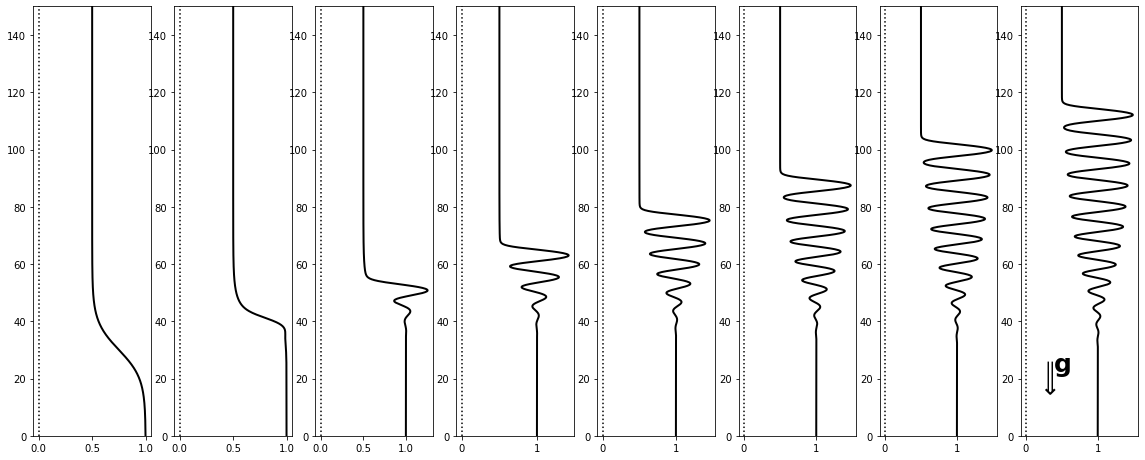

In [16]:
def get_compaction_rate_dirichlet(phi, n, dz, phi0):
    n_ = len(phi)
    perm = np.sqrt((phi[0:-1] ** n) * (phi[1:] ** n))
    # rhs
    b = np.zeros(n_, dtype=float)
    b[1:-1] = phi0 * dz * (perm[1:] - perm[0:-1])
    # matrix
    mat = np.zeros(n_*n_).reshape(n_, n_)
    ids = np.arange(n_)
    # diagonal
    mat[ids, ids] = 1.0
    mat[ids[1:-1], ids[1:-1]] = -(perm[0:-1] + perm[1:] + dz * dz)
    # super diagonal
    mat[ids[1:-1], ids[2:]] = perm[1:]
    # sub diagonal
    mat[ids[1:-1], ids[0:-2]] = perm[0:-1]
    Cmp = np.linalg.solve(mat, b)
    return Cmp


def solitary_wave_update_porosity(PhiOld, n, phi0, dz, dt):
    Cmp = get_compaction_rate_dirichlet(PhiOld, n, dz, phi0)
    PhiNew = PhiOld + dt * Cmp / phi0
    Cmp = 0.5 * (Cmp + get_compaction_rate_dirichlet(PhiNew, n, dz, phi0))
    PhiNew = PhiOld + dt * Cmp / phi0
    return PhiNew


phi0 = 0.05  # background porosity
A = 1.5  # amplitude of step
zmax = 150.  # total size of domain
z0 = zmax / 5.  # location of step
zw = 10.  # width of step
n = 3.  # permeability exponent
Nz = 1000  # number of grid points
cfl = 1.  # courant limit on time-step
tmax = 50.  # maximum time

# initial condition
z = np.linspace(0.0, zmax, Nz)
f = 1. - (A - 1.) * (1 + np.tanh((z - z0) / zw)) / 2.

# derived parameters
dz = z[1] - z[0]
V = (1. - phi0 ** n) / (1. - phi0)
dt = cfl * dz / V
Nt = np.ceil(tmax / dt)
t = 0

ncurves = 8
xoffset = 1.5
xmax = 1.1
tplot = np.linspace(0.0, tmax, ncurves)
iplot = np.floor(tplot / dt).astype(int)

zoom = 2.0
fig, axs = plt.subplots(1, ncurves, figsize=(zoom * 9.9, zoom * 3.95))
fig.set_facecolor('w')
c = 0

for i in np.arange(Nt):
    if i in iplot:
        axs[c].plot(f, z, '-k', linewidth=2, label=str(t))
        axs[c].plot([0.0, 0.0], [0., zmax], ':k')
        axs[c].set_ylim(0., zmax)
        c = c+1

    f = solitary_wave_update_porosity(f, n, phi0, dz, dt)
    t = t + dt

# plt.xlabel(r'$\varphi$', fontsize=20)
# plt.ylabel(r'$z$, compaction lengths', fontsize=20)
# set(ax, 'xtick', xt, 'xticklabel', xtlab);
plt.text(0.5, 20., r'$\mathbf{g}$', fontsize=25, ha='center', va='bottom')
plt.text(0.5, 20., r'$\Longleftarrow$', fontsize=25, ha='right', va='center', rotation=90)

plt.show()